<h1><center>Segment customers of an e-commerce: EDA</center></h1>

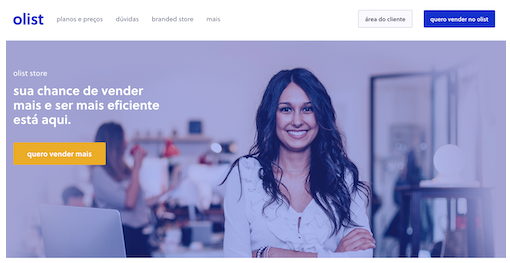

### TABLE OF CONTENTS
#### Project display
#### 1. Data Extractions And Exploratory Analysis
* 1-1. Importing Python modules
* 1-2. Get the Data
* 1-3. Data Preparation & Data Cleaning
* * 1-3-1. Data cleaning: NaN
* * 1-3-2. Data cleaning: Duplicates
* * 1-3-2. Data cleaning: Outliers
* 1-4. Feature Engineering: new features

#### 2. RFM Analysis
* 2.1 Recency
* 2.2 Frequency — Monetary 

### Project display

**Olist** wants to provide its e-commerce teams with **customer segmentation** that they can use on a daily basis for their communication campaigns.

The goal is to understand the different types of users through their behavior and personal data.

The goal is to provide the marketing team with an actionable description of a segmentation and its underlying logic for optimal use, as well as a maintenance contract proposal based on an analysis of segment stability over the course of the time.

### 1.  Data Extractions And Exploratory Analysis
#### 1-1. Importing python modules

In [1]:
from olist_eda_functions import *

%pylab inline
%matplotlib inline
pd.set_option('display.max_columns',200)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# For full display of DataFrames.
pd.set_option("expand_frame_repr", True)

#### 1-2. Get the Data

In [3]:
# We get the datasets.
df_dataset_names = Get_File_names(Get_Files(Get_Data_Path())) 
df_files = Read_Files(Get_Files(Get_Data_Path()),Get_Data_Path())

In [4]:
# We build a dictionary where we put all the datasets.
dict_dfs = {df_dataset_names[i]: df_files[i] for i in range(len(df_files))}

#### 1-3. Data Cleaning & Data Preparation
##### 1-3-1. Data Cleaning: Data Cleaning

In [5]:
# Get general information about all datasets.
for i in dict_dfs:
    print(10*"=",i,10*"=")
    dict_dfs[i].info()

========== df_customers ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
========== df_geolocation ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              100016

##### 1-3-1-1. Data Cleaning: missing values

In [6]:
# Check the NaNs values for each variable.
Check_NaN(dict_dfs)

========== df_customers ==========
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64
========== df_geolocation ==========
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64
========== df_orders ==========
order_delivered_customer_date    0.029817
order_delivered_carrier_date     0.017930
order_approved_at                0.001609
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
dtype: float64
========== df_order_items ==========
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price   

**Note:** It is estimated that only the **df_order_reviews** contains significant NaNs for the variables:
- **review_comment_message:** contains 59% NaN value.
- **review_comment_title:** contains 88% NaN value.

These are comments, so they can be droped.

In [7]:
dict_dfs['df_order_reviews'].columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [8]:
# We remove the "review_comment_message" and "review_comment_title"
dict_dfs['df_order_reviews'] = Drop_NaN_columns(dict_dfs['df_order_reviews'], 0.5)

In [9]:
# Check again if some NaNs values remain.
Check_NaN(dict_dfs)

========== df_customers ==========
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64
========== df_geolocation ==========
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64
========== df_orders ==========
order_delivered_customer_date    0.029817
order_delivered_carrier_date     0.017930
order_approved_at                0.001609
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
dtype: float64
========== df_order_items ==========
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price   

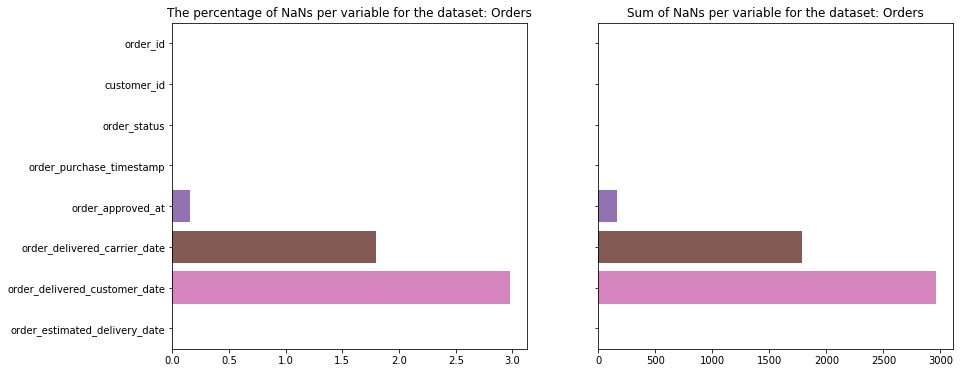

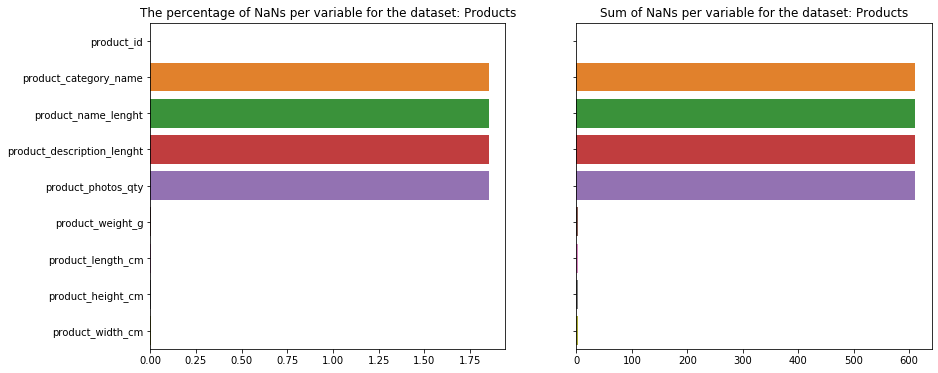

In [10]:
# We display the distribution of NaNs (Sum and percentage):
for i in dict_dfs:
    Display_NaNs(dict_dfs[i],i)

In [11]:
# We display the indexes of all the rows where there are NaNs.
for i in dict_dfs:
    NaN_index(dict_dfs[i])

======= customer_id =========
customer_id Int64Index([], dtype='int64')
======= customer_unique_id =========
customer_unique_id Int64Index([], dtype='int64')
======= customer_zip_code_prefix =========
customer_zip_code_prefix Int64Index([], dtype='int64')
======= customer_city =========
customer_city Int64Index([], dtype='int64')
======= customer_state =========
customer_state Int64Index([], dtype='int64')
======= geolocation_zip_code_prefix =========
geolocation_zip_code_prefix Int64Index([], dtype='int64')
======= geolocation_lat =========
geolocation_lat Int64Index([], dtype='int64')
======= geolocation_lng =========
geolocation_lng Int64Index([], dtype='int64')
======= geolocation_city =========
geolocation_city Int64Index([], dtype='int64')
======= geolocation_state =========
geolocation_state Int64Index([], dtype='int64')
======= order_id =========
order_id Int64Index([], dtype='int64')
======= customer_id =========
customer_id Int64Index([], dtype='int64')
======= order_status =

**The number of NaNs is the same for some variables, the indexes are the same. In addition, as a percentage, it is between 0% to 2% of the total values. So we decided to drope them.** 

In [12]:
# Drope rows that contain NaNs values.
for i in dict_dfs:
    #print(i)
    #print(i, type(dict_dfs[i]))
    Drop_NaNs(dict_dfs[i])

C:\Users\zahri\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
# Check the NaNs values for each variable.
Check_NaN(dict_dfs)

========== df_customers ==========
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64
========== df_geolocation ==========
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64
========== df_orders ==========
order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
dtype: float64
========== df_order_items ==========
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value        

##### 1-3-1-2. Data Cleaning: Duplicates

In [14]:
# Show columns that contain duplicates.
Check_Duplicate_Value(dict_dfs)

The number of duplicates for df_geolocation is:  261831


**Many duplicates for geolocation, so we will explore them to understand the nature of these duplicates **

In [15]:
# Display the duplicated rows.
dict_dfs['df_geolocation'][dict_dfs['df_geolocation'].index.duplicated()==True]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


##### 1-3-1-3. Data Cleaning: Negative numerical values.

**We must check if negative numeric values exist in the data supposed to have none.**

In [16]:
# check the negatif values
Get_Negatif_Value(dict_dfs)

df_geolocation . geolocation_lat : -36.6053744107061
df_geolocation . geolocation_lng : -101.46676644931476
df_order_items . price : 0.85
df_order_items . freight_value : 0.0
df_order_payments . payment_value : 0.0
df_products . product_name_lenght : 5.0
df_products . product_description_lenght : 4.0
df_products . product_photos_qty : 1.0
df_products . product_weight_g : 0.0
df_products . product_length_cm : 7.0
df_products . product_height_cm : 2.0
df_products . product_width_cm : 6.0


*We note that there is no abnormal negative value, on the other hand we note the presence of **Zero value** where it should not be:*
- Example: product_weight_g =0, payment_value = 0, these values must not be equal to zero, these transactions could represent cancelled orders by customers or bad debt incurred by the business.

     **Weight and price must always be greater than zero.**

##### 1-3-1-4. Data Cleaning: Numerical values with zero.

Checks for zero values of:

- 'product_weight_g' in 'df_products'
- 'payment_value' in 'df_order_payments'
- 'freight_value' in 'df_order_items'

In [17]:
Check_Zero_Value(dict_dfs)

The number of zeros in freight_value is: 383
The number of elements in freight_value is: 112650
The number of zeros in payment_value is: 9
The number of elements in payment_value is: 103886
The number of zeros in product_weight_g is: 4
The number of elements in product_weight_g is: 32340


**Note:** the number of zeros is negligible, so we will delete them, because it is possible that it is a canceled payment therefore not counted following an error during payment...

In [18]:
# We drope the rows where the payments are zero.
Drope_Zero_Value(dict_dfs)

In [19]:
# Check of zero values again.
Check_Zero_Value(dict_dfs)

**We note that the time variables are not converted to datetime.**

#### 1.3.2  Data Preparation: Concatenation of datasets.

**To make data processing more efficient, we will focus on consumer behavior. For this, we will explore all the datasets:**

- We will select all the datasets that impact the consumer.
- We are going to create the exploration tree: all the variables that describe the behavior of consumers.

The following diagram shows the concatenation strategy to have a single DataFrame.

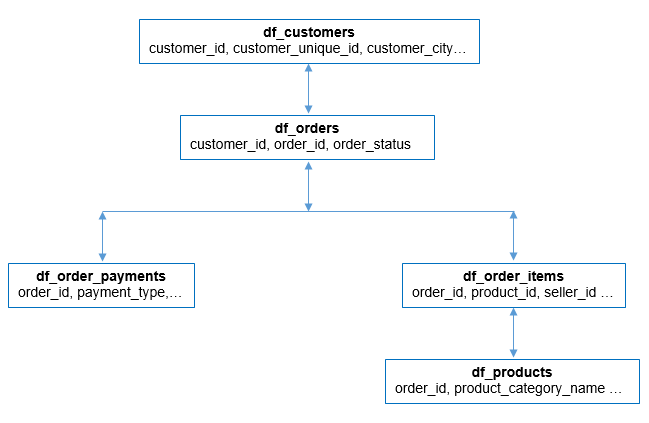

In [20]:
# We define the variables necessary for the concatenation.
df_orders = dict_dfs['df_orders']
df_order_items = dict_dfs['df_order_items']
df_order_payments = dict_dfs['df_order_payments']
df_customers = dict_dfs['df_customers']
df_products = dict_dfs['df_products']
df_review = dict_dfs['df_order_reviews']

In [21]:
df_review = df_review.groupby('order_id').agg({'review_score':['mean']})
df_review.columns = ['review_score']
df_review.reset_index()

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0
...,...,...
98668,fffc94f6ce00a00581880bf54a75a037,5.0
98669,fffcd46ef2263f404302a634eb57f7eb,5.0
98670,fffce4705a9662cd70adb13d4a31832d,5.0
98671,fffe18544ffabc95dfada21779c9644f,5.0


In [22]:
df_order_payments = df_order_payments.groupby(['order_id','payment_type', 'payment_sequential', 'payment_installments'], as_index=False).agg({'payment_value':['mean']})
df_order_payments.columns = ['order_id', 'payment_type', 'payment_sequential', 'payment_installments', 'payment_value']

In [23]:
df_order_items = df_order_items.groupby(['order_id', 'product_id'], as_index=False).agg({'order_item_id':['count'], 'price':['mean'],'freight_value':['mean']})
df_order_items.columns = ['order_id', 'product_id', 'order_item_id', 'price', 'freight_value']

In [24]:
df_order_items

,order_id,product_id,order_item_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,199.90,18.14
...,...,...,...,...,...
102081,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,1,299.99,43.41
102082,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,1,350.00,36.53
102083,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,1,99.90,16.95
102084,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,1,55.99,8.72


In [25]:
df_products = df_products[['product_id', 'product_category_name']]

In [26]:
df_orders = df_orders[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']]

In [27]:
df_customers = df_customers[['customer_id', 'customer_unique_id']]

In [28]:
df_order_payment = pd.merge(df_review, df_order_payments, on='order_id', how='inner')

In [29]:
df_order_payment

,order_id,review_score,payment_type,payment_sequential,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,5.0,credit_card,1,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,4.0,credit_card,1,3,259.83
2,000229ec398224ef6ca0657da4fc703e,5.0,credit_card,1,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,4.0,credit_card,1,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0,credit_card,1,3,218.04
...,...,...,...,...,...,...
103072,fffc94f6ce00a00581880bf54a75a037,5.0,boleto,1,1,343.40
103073,fffcd46ef2263f404302a634eb57f7eb,5.0,boleto,1,1,386.53
103074,fffce4705a9662cd70adb13d4a31832d,5.0,credit_card,1,3,116.85
103075,fffe18544ffabc95dfada21779c9644f,5.0,credit_card,1,3,64.71


In [30]:
df_order_items_payment = pd.merge(df_order_payment, df_order_items, on='order_id', how='inner')

In [31]:
df_order_items_payment

,order_id,review_score,payment_type,payment_sequential,payment_installments,payment_value,product_id,order_item_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,5.0,credit_card,1,2,72.19,4244733e06e7ecb4970a6e2683c13e61,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,4.0,credit_card,1,3,259.83,e5f2d52b802189ee658865ca93d83a8f,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,5.0,credit_card,1,5,216.87,c777355d18b72b67abbeef9df44fd0fd,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,4.0,credit_card,1,2,25.78,7634da152a4610f1595efa32f14722fc,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0,credit_card,1,3,218.04,ac6c3623068f30de03045865e4e10089,1,199.90,18.14
...,...,...,...,...,...,...,...,...,...,...
105837,fffc94f6ce00a00581880bf54a75a037,5.0,boleto,1,1,343.40,4aa6014eceb682077f9dc4bffebc05b0,1,299.99,43.41
105838,fffcd46ef2263f404302a634eb57f7eb,5.0,boleto,1,1,386.53,32e07fd915822b0765e448c4dd74c828,1,350.00,36.53
105839,fffce4705a9662cd70adb13d4a31832d,5.0,credit_card,1,3,116.85,72a30483855e2eafc67aee5dc2560482,1,99.90,16.95
105840,fffe18544ffabc95dfada21779c9644f,5.0,credit_card,1,3,64.71,9c422a519119dcad7575db5af1ba540e,1,55.99,8.72


In [32]:
df_order_product = pd.merge(df_order_items_payment, df_products, on='product_id', how='inner')

In [33]:
df_order = pd.merge(df_order_product, df_orders, on='order_id', how='inner')
df = pd.merge(df_customers, df_order, on='customer_id', how='inner')

In [34]:
df

,customer_id,customer_unique_id,order_id,review_score,payment_type,payment_sequential,payment_installments,payment_value,product_id,order_item_id,price,freight_value,product_category_name,order_status,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,4.0,credit_card,1,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,1,124.99,21.88,moveis_escritorio,delivered,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,5.0,credit_card,1,8,335.48,4aa6014eceb682077f9dc4bffebc05b0,1,289.00,46.48,utilidades_domesticas,delivered,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,5.0,credit_card,1,7,157.73,bd07b66896d6f1494f5b86251848ced7,1,139.94,17.79,moveis_escritorio,delivered,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,5.0,credit_card,1,1,173.30,a5647c44af977b148e0a3a4751a09e2e,1,149.94,23.36,moveis_escritorio,delivered,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,5.0,credit_card,1,8,252.25,9391a573abe00141c56e38d84d7d5b3b,1,230.00,22.25,casa_conforto,delivered,2018-07-29 09:51:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102106,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,4.0,credit_card,1,6,88.78,ccb4503d9d43d245d3b295d0544f988b,1,74.90,13.88,livros_interesse_geral,delivered,2018-04-07 15:48:17
102107,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,5.0,credit_card,1,3,129.06,9ede6b0570a75a4b9de4f383329f99ee,1,114.90,14.16,esporte_lazer,delivered,2018-04-04 08:20:22
102108,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,1.0,credit_card,1,5,56.04,7a5d2e1e131a860ae7d18f6fffa9d689,1,37.00,19.04,beleza_saude,delivered,2018-04-08 20:11:50
102109,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,5.0,credit_card,1,2,711.07,f819f0c84a64f02d3a5606ca95edd272,1,689.00,22.07,relogios_presentes,delivered,2017-11-03 21:08:33


In [35]:
df.isna().sum()

customer_id                 0
customer_unique_id          0
order_id                    0
review_score                0
payment_type                0
payment_sequential          0
payment_installments        0
payment_value               0
product_id                  0
order_item_id               0
price                       0
freight_value               0
product_category_name       0
order_status                0
order_purchase_timestamp    0
dtype: int64

#### 1.3.3-5  Data Cleaning: Outliers

In [36]:
df.order_item_id = df.order_item_id.astype(int)
df.review_score = df.review_score.astype(int)

In this project, the K-Means DBScan algorithms will be used, it is important to specify whether these algorithms are sensitive or not to outliers.

**K-Means is a kind of clustering algorithm, maybe the most famous. The center of a cluster for K-Means is the mean. Consequently, it is sensitive to outliers.**

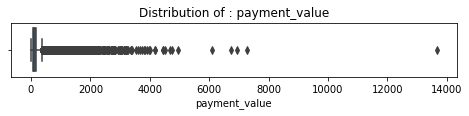

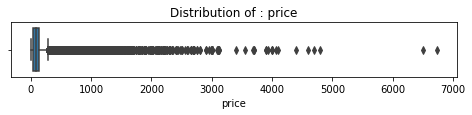

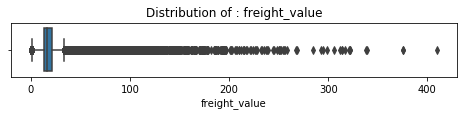

In [37]:
# We display the boxplots to search for outliers.
box_plot(df)

#### - handling outliers

The data points that are lesser than the 1st percentile are replaced with the 1st percentile value and the data points that are greater than the 99.9th percentile are replaced with 99.9th percentile value.

Visualizing the data after treating the outliers

In [38]:
for col in df.select_dtypes('float'):
    handling_outliers_percentile(df,col, 0, 99.99)

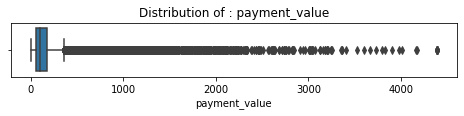

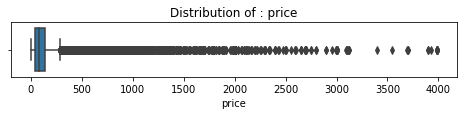

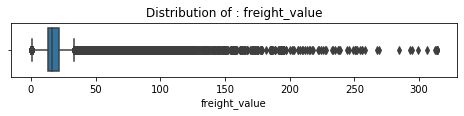

In [39]:

box_plot(df)

There is a good improvement by setting the maximum at 99.9 percentile and the minimum at 0 percentile.

#### 1.3.7.3  Exploratory Data Analysis: treatment of "time" variables

In [40]:
# Display the types of "time" variables.
df['order_purchase_timestamp']

0         2017-05-16 15:05:35
1         2018-01-12 20:48:24
2         2018-05-19 16:07:45
3         2018-03-13 16:06:38
4         2018-07-29 09:51:30
                 ...         
102106    2018-04-07 15:48:17
102107    2018-04-04 08:20:22
102108    2018-04-08 20:11:50
102109    2017-11-03 21:08:33
102110    2017-12-19 14:27:23
Name: order_purchase_timestamp, Length: 102111, dtype: object

**We note that the type of 'order_purchase_timestamp' is not datetime, they must be converted.**

In [41]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [42]:
# We check if the variables have been converted to datetime.
df['order_purchase_timestamp'].dtypes

dtype('<M8[ns]')

#### 1.3.8  Exploratory Data Analysis: Correlation and distribution of variables.

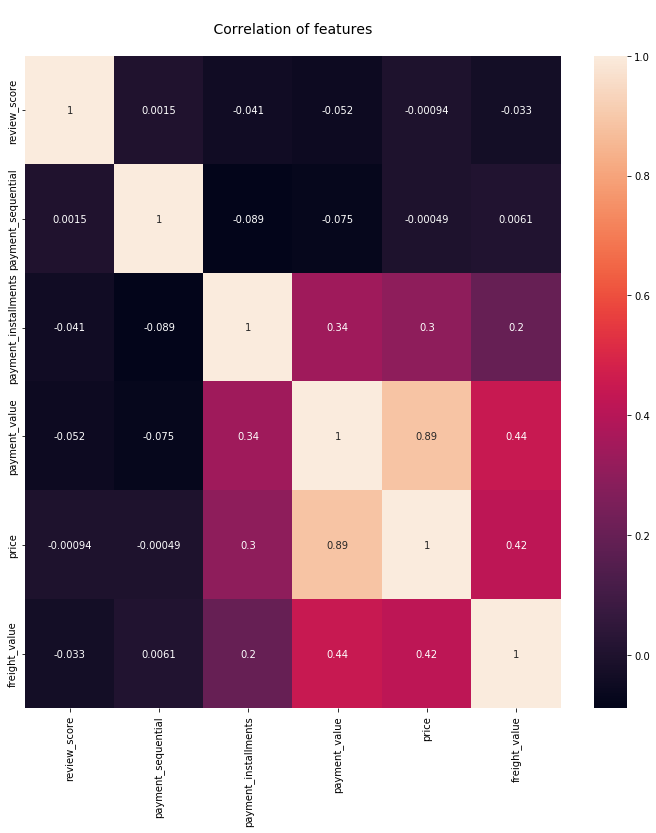

In [43]:
# Correlation matrix
plt.figure(figsize=(12,12))
# Correlation matrix heatmap
sns.heatmap(df.drop(['order_item_id'], axis=1).corr(),annot=True)
#plt.ylim(0, matrix_corr.shape[0])
plt.title("\n Correlation of features \n", size=14)
plt.show()

#### **We note that there are some correlations:**
- payment_value & price 89%

We can verify that in general: **payment_value ~ Price + Freight_value**

Text(0.5, 1.0, 'Differece between payment value and price + freight_value')

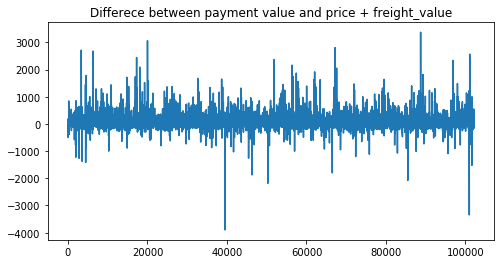

In [44]:
plt.figure(figsize = (8,4))
(df["payment_value"] -(df['price'] + df['freight_value'])).plot()

plt.title("Differece between payment value and price + freight_value")

In [45]:
(df["payment_value"] -(df['price'] + df['freight_value'])).describe()

count    102111.000000
mean         12.773310
std          95.972676
min       -3899.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3374.889360
dtype: float64

In [46]:
df["payment_value"].describe()

count    102111.000000
mean        156.652948
std         209.848832
min           0.010000
25%          57.720000
50%         102.130000
75%         176.200000
max        4388.479360
Name: payment_value, dtype: float64

**We can therefore delete the two variables: 'price' and 'freight_value'**

In [47]:
df = df.drop(axis=1, columns=['price', 'freight_value'])

Text(0, 0.5, 'Count')

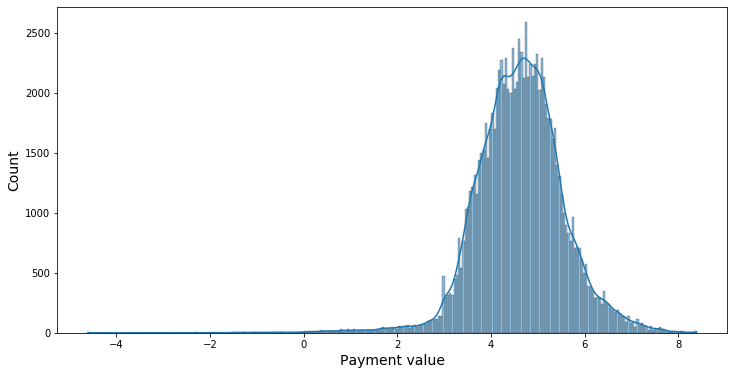

In [48]:
# we plot the distribution of 'Payment_value'.
plt.figure(figsize=(12,6))
ax = sns.histplot(np.log(df["payment_value"]), palette='bright', kde=True)
ax.set_xlabel("Payment value", size=14)
ax.set_ylabel("Count", size=14)

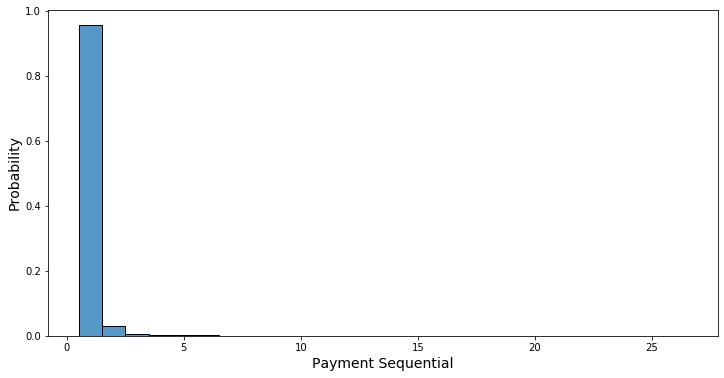

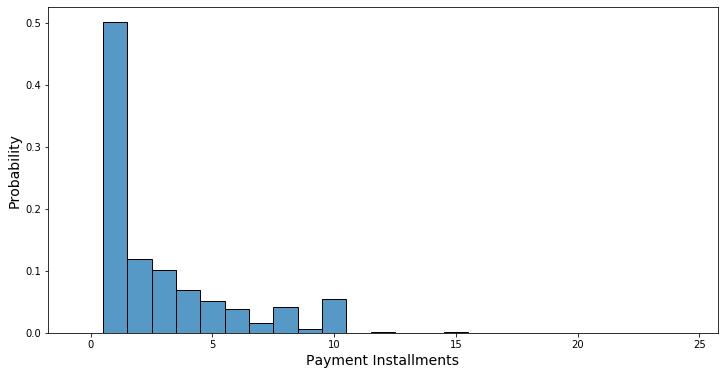

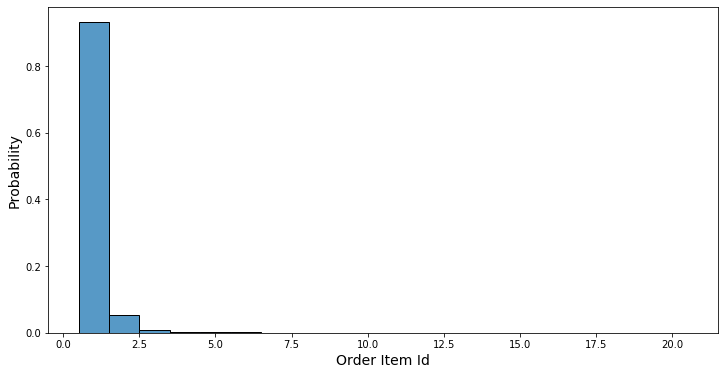

In [49]:
# We plot the distribution of 'payment_sequential', 'payment_installations', 'order_item_id'.
for i in ['payment_sequential', 'payment_installments', 'order_item_id']:
    plt.figure(figsize=(12,6))
    ax = sns.histplot(df[i], kde=False, palette='bright', bins=50,stat="probability", discrete=True)
    ax.set_xlabel(' '.join(i.split('_')).title(), size=14)
    ax.set_ylabel("Probability", size=14)

**The number of items per order is 1 for 87%.**

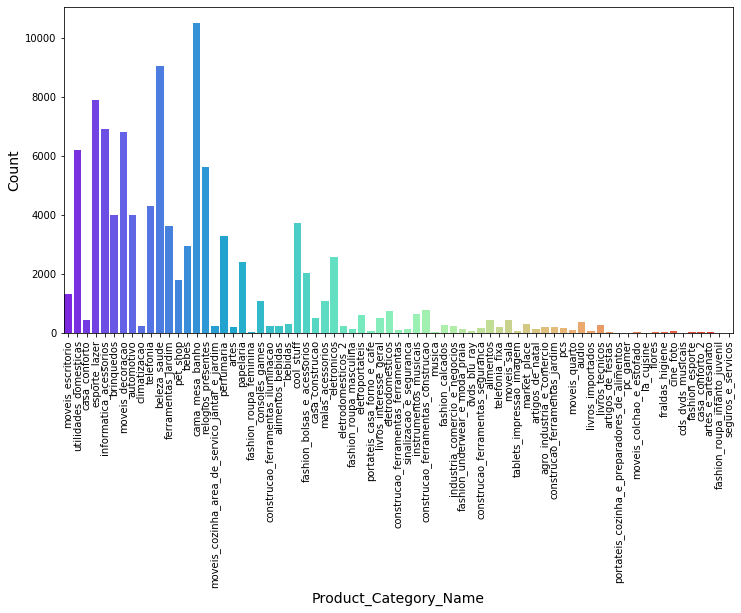

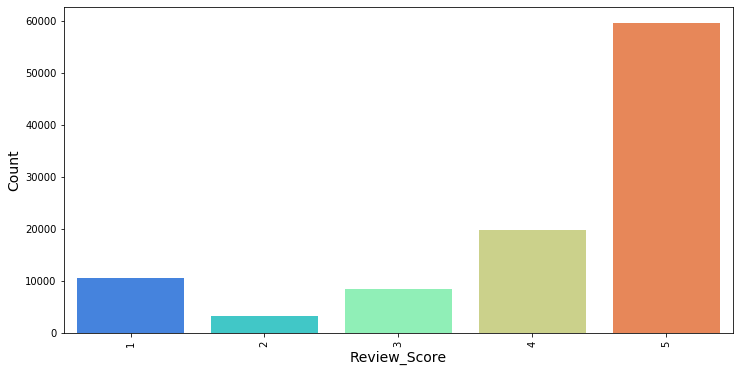

In [50]:
# We display the distribution of purchased product category names.
for col in ['product_category_name', 'review_score']:
    plt.figure(figsize=(12,6))
    ax = sns.countplot(x=df[col], palette='rainbow')
    ax.set_xlabel(col.title(), size=14)
    ax.set_ylabel("Count", size=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

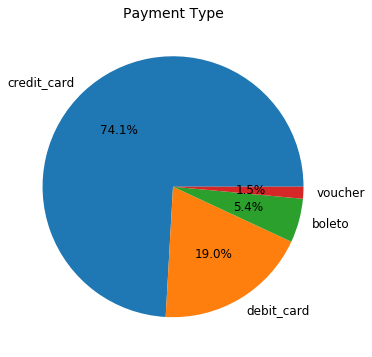

In [51]:
# We display the type of payment distribution.
plot_pie(df,['payment_type'])

In [52]:
# We add the variables: purchase per hour, day, week, month, year.
df["purchase_per_hour"] = df["order_purchase_timestamp"].dt.hour
df["purchase_per_month"] = df["order_purchase_timestamp"].dt.month_name()
df["purchase_per_day_of_month"] = df["order_purchase_timestamp"].dt.day
df["purchase_per_day"] = df["order_purchase_timestamp"].dt.day_name()
df["purchase_per_week"] = df['order_purchase_timestamp'].dt.isocalendar().week
df["purchase_per_year"] = df['order_purchase_timestamp'].dt.year

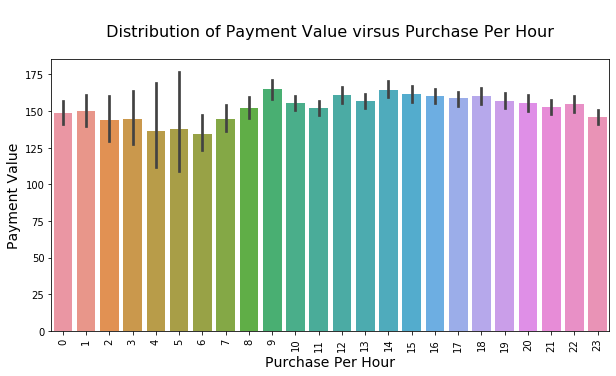

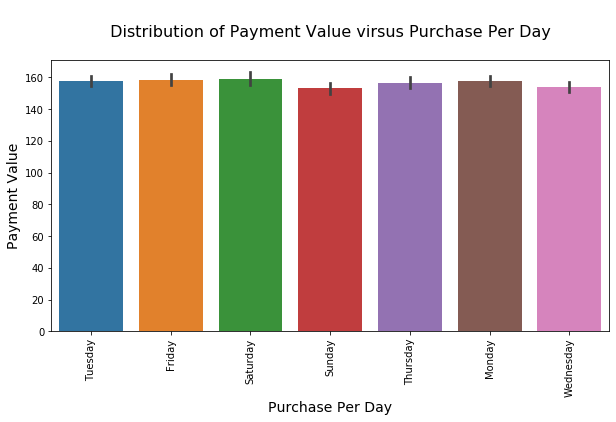

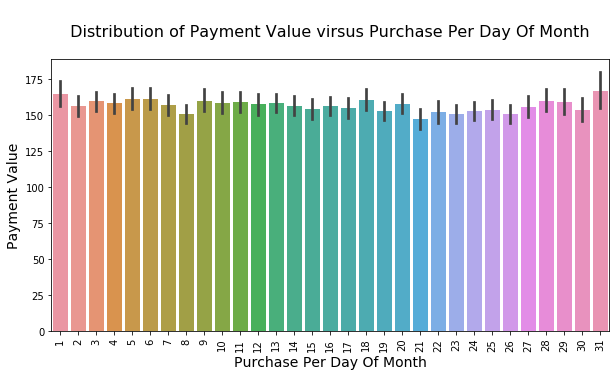

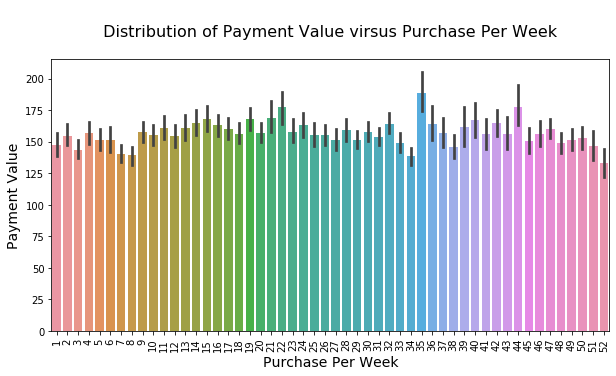

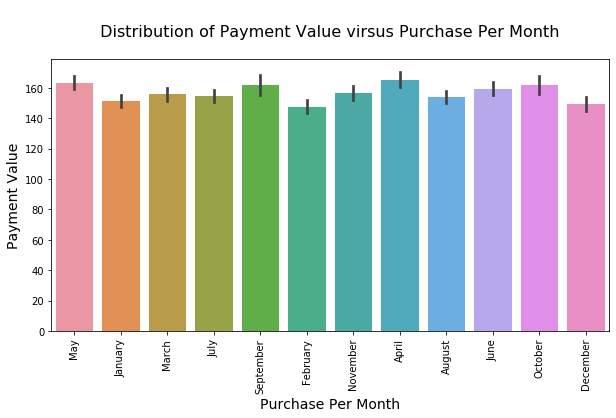

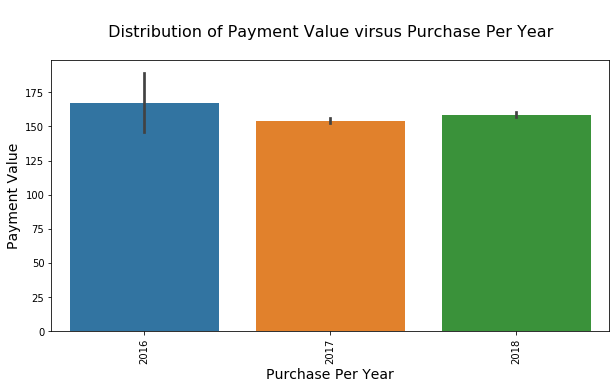

In [53]:
# Display the distribution of 'payment value' as a function of time. 
for i in ['purchase_per_hour','purchase_per_day', 'purchase_per_day_of_month',
          'purchase_per_week', 'purchase_per_month', 'purchase_per_year']:
    plot_bi_var_bar (i,'payment_value',df)

**We notice that consumers buy more during:**
- Hours between 9 a.m. and 3 p.m.
- The 29th of each month.
- Week 39 of the year.
- The month of September in general.


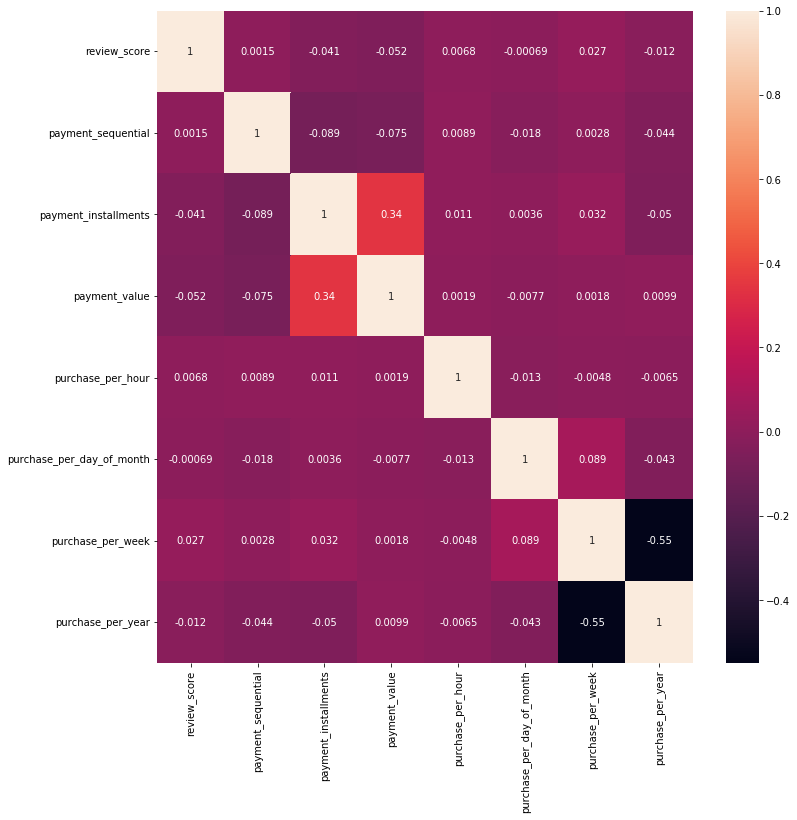

In [54]:
# we display correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(df.drop(['order_item_id'], axis=1).corr(),annot=True)

### 2. RFM Analysis 

“RFM” is a method used for analyzing customer value. RFM stands for Recency (R) — Frequency (F)— Monetary Value(M). It groups customers based on their transactional history:

    R — Duration between analysis date and latest purchase date.

    F — Count the number of invoices for each customer ID.

    M — Sum of purchasing amount over the period of time for each customer ID.
    
For more detail about RFM analysis please refer to this <a href="https://www.dase-analytics.com/blog/en/rfm-analysis/">blog</a>.

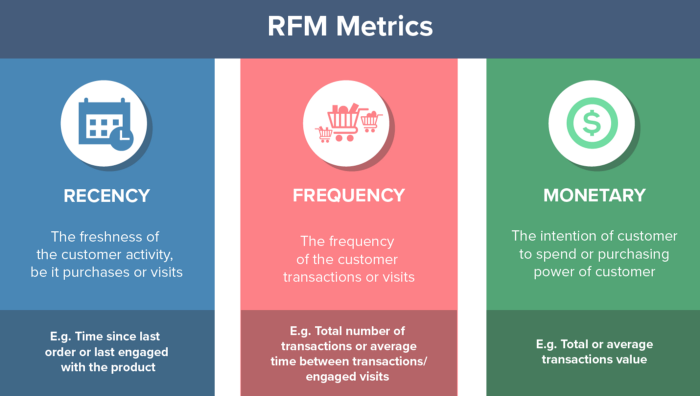

To start the RFM analysis we will first build a dataframe containing all useful variables.

In [55]:
# We select only the variables that could help us in the RFM analysis.
df_rfm_with_review_score = df.groupby('customer_unique_id').agg({'order_purchase_timestamp': ['min','max','count'],
                                                                'payment_value': ['sum','mean'], 'review_score':['mean']})
df_rfm_with_review_score.head()

order_purchase_timestamp                      \
                                                      min                 max   
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27 2018-05-10 10:56:27   
0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27 2018-05-07 11:11:27   
0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03 2017-03-10 21:05:03   
0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41 2017-10-12 20:29:41   
0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42 2017-11-14 19:45:42   

                                       payment_value         review_score  
                                 count           sum    mean         mean  
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2     1        141.90  141.90          5.0  
0000b849f77a49e4a4ce2b2a4ca5be3f     1         27.19   27.19          4.0  
0000f46a3911fa3c0805444483337064     1         86.22   86.22          3.0  
0000f6ccb0745a6a4b88665a16c9f078     1         43.62   43.62          4.0  
0004aac84e0df4da2b147fca70cf8255     1        196.89  196.89          5.0

In [56]:
# Rename of columns.
df_rfm_with_review_score.columns = ['first_purchase_order', 'last_purchase_order','purchase_order_count', 'sum_payment_value', 
                                'mean_payment_value', 'review_score_mean']
df_rfm_with_review_score.head()

,first_purchase_order,last_purchase_order,purchase_order_count,sum_payment_value,mean_payment_value,review_score_mean
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,141.90,141.90,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,27.19,27.19,4.0
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,86.22,86.22,3.0
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,43.62,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,196.89,196.89,5.0


#### 2.1 Recency

In [57]:
# We calculate the first and the last purchase and the time between them.
last_purchase = df.order_purchase_timestamp.max().to_period('M')
first_purchase = df.order_purchase_timestamp.min().to_period('M')
print("Last purchase: ", df.order_purchase_timestamp.max())
print("First purchase: ", df.order_purchase_timestamp.min())
print("Periode between the last and the first: ", last_purchase - first_purchase)

Last purchase:  2018-08-29 15:00:37
First purchase:  2016-10-03 09:44:50
Periode between the last and the first:  <22 * MonthEnds>


The last purchase date is 2018-09-03, we will use this date to calculate Recency.

In [58]:
Now = df.order_purchase_timestamp.max() 
df_rfm_with_review_score['Recency'] = df_rfm_with_review_score.last_purchase_order.apply(lambda x:(Now-x).days)
df_rfm_with_review_score.head()

,first_purchase_order,last_purchase_order,purchase_order_count,sum_payment_value,mean_payment_value,review_score_mean,Recency
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,141.90,141.90,5.0,111
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,27.19,27.19,4.0,114
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,86.22,86.22,3.0,536
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,43.62,43.62,4.0,320
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,196.89,196.89,5.0,287


#### 2.2 Frequency — Monetary 

In [59]:
# We rename purchase_order_count by Frequency and sum_payment_value by Monetary.
df_rfm_with_review_score.rename(columns = {'purchase_order_count':'Frequency', 'sum_payment_value':'Monetary'}, inplace = True)
df_rfm_with_review_score.head()

,first_purchase_order,last_purchase_order,Frequency,Monetary,mean_payment_value,review_score_mean,Recency
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,141.90,141.90,5.0,111
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,27.19,27.19,4.0,114
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,86.22,86.22,3.0,536
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,43.62,43.62,4.0,320
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,196.89,196.89,5.0,287


In [60]:
# We select only RFM features.
df_rfm = df_rfm_with_review_score[['Recency', 'Frequency', 'Monetary']]
df_rfm.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89


Now we split the metrics into segments using quantiles. We will assign a score from 1 to 4 to each Recency, Frequency and Monetary respectively. 1 is the highest value, and 4 is the lowest value. A final **RFM score** (Overall Value) is calculated simply by combining individual RFM score numbers.

We will calculate quartile values for each R, F, M values

In [61]:
quantiles = df_rfm.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 113.0, 0.5: 218.0, 0.75: 345.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 63.1, 0.5: 108.81, 0.75: 188.34}}

The resulting table has our Recency, Frequency and Monetary columns, along with the quartile for each value

Rscore and FMscore are two Functions to calculate the Quantile scores for Recency, Frequency and Monetary.

In [62]:
# Creation of three variables 'R_Quartile', 'F_Quartile', 'M_Quartile' 
df_rfm['R_Quartile'] = df_rfm['Recency'].apply(Rscore, args=('Recency', quantiles))
df_rfm['F_Quartile'] = df_rfm['Frequency'].apply(FMscore, args=('Frequency', quantiles))
df_rfm['M_Quartile'] = df_rfm['Monetary'].apply(FMscore, args=('Monetary', quantiles))
df_rfm.head()

C:\Users\zahri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zahri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zahri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,4,4
0000f46a3911fa3c0805444483337064,536,1,86.22,4,4,3
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,3,4,4
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,3,4,1


To finish this off, we just need to concatenate the three score columns.

In [63]:
df_rfm['RFM_Segment'] = df_rfm.R_Quartile.map(str)+df_rfm.F_Quartile.map(str)+df_rfm.M_Quartile.map(str)
df_rfm['RFM_Score'] = df_rfm[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
df_rfm.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2,142,7
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,4,4,244,10
0000f46a3911fa3c0805444483337064,536,1,86.22,4,4,3,443,11
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,3,4,4,344,11
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,3,4,1,341,8


In [64]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91151 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      91151 non-null  int64  
 1   Frequency    91151 non-null  int64  
 2   Monetary     91151 non-null  float64
 3   R_Quartile   91151 non-null  int64  
 4   F_Quartile   91151 non-null  int64  
 5   M_Quartile   91151 non-null  int64  
 6   RFM_Segment  91151 non-null  object 
 7   RFM_Score    91151 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.3+ MB


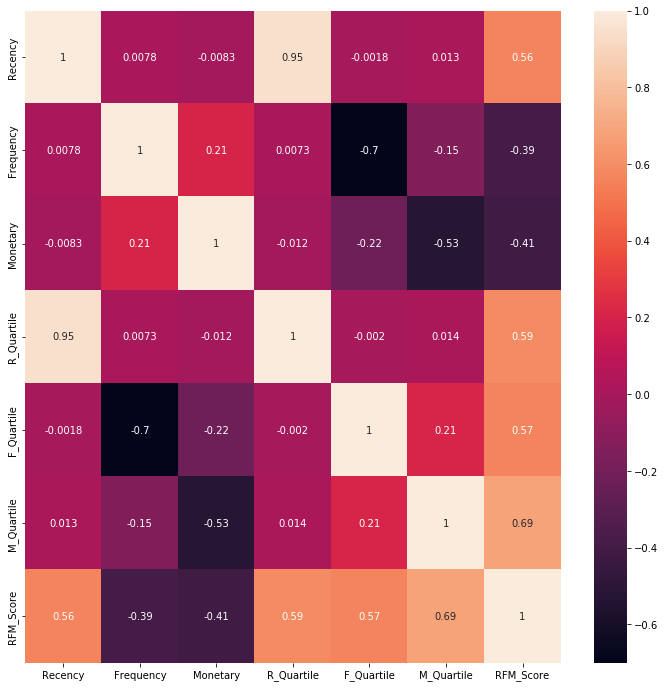

In [65]:
plt.figure(figsize=(12,12))
sns.heatmap(df_rfm.corr(),annot=True)

In [66]:
# the review score can play a certain role, so we will create a second dataframe with this variable for the modeling part.
df_rfm_review_score = df_rfm.copy()
df_rfm_review_score['mean_review_score'] = df_rfm_with_review_score['review_score_mean']
df_rfm_review_score.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,mean_review_score
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2,142,7,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,4,4,244,10,4.0
0000f46a3911fa3c0805444483337064,536,1,86.22,4,4,3,443,11,3.0
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,3,4,4,344,11,4.0
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,3,4,1,341,8,5.0


RFM segmentation readily shows customer for any business like Best Customers, Loyal Customer, Customers on the verge of losing, Highest revenue-generating customers etc.

In [67]:
print("Best Customers: ", len(df_rfm[df_rfm['RFM_Segment']=='111']))
print("Loyal Customers: ", len(df_rfm[df_rfm['F_Quartile']==1]))
print("Big Spenders: ", len(df_rfm[df_rfm['M_Quartile']==1]))
print("Almost Lost: ", len(df_rfm[df_rfm['RFM_Segment']=='134']))
print("Lost Customers: ", len(df_rfm[df_rfm['RFM_Segment']=='344']))
print("Lost Cheap Customers: ", len(df_rfm[df_rfm['RFM_Segment']=='444']))


Best Customers:  1288
Loyal Customers:  7979
Big Spenders:  22786
Almost Lost:  0
Lost Customers:  5365
Lost Cheap Customers:  5547


In [68]:
# Save to pickle the data that will be used in the modeling and maintenance part.
df[['customer_unique_id', 'order_purchase_timestamp', 'payment_value']].to_pickle('pickle_df.pkl')
df_rfm.iloc[:,:3].to_pickle('pickle_df_rfm.pkl')
df_rfm_review_score[['Recency', 'Frequency', 'Monetary', 'mean_review_score']].to_pickle('pickle_df_rfm_review_score.pkl')